In [1]:
import torch
import fastai


In [2]:
print(torch.__version__)
print(fastai.__version__)

2.5.1+cu121
2.8.2


=> Dataset which open sourse is Google (Open images Dataset v4)
=> it is download via this link(OIDv4_Toolkit) => https://github.com/EscVM/OIDv4_ToolKit

=>to download OIDV4_Toolkit 

In [3]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...


=>to pip install requirement

In [ ]:
%pip install -r "D:\PycharmProjects\AllProjects_of_Python\DeepLearning\Project\OIDv4_ToolKit/requirements.txt"


=> to check main.py with help 

In [6]:
!python "D:\PycharmProjects\AllProjects_of_Python\DeepLearning\Project\OIDv4_ToolKit/main.py" --help


usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0]
               [--image_IsGroupOf 1 or 0] [--image_IsDepiction 1 or 0]
               [--image_IsInside 1 or 0] [--multiclasses 0 (default or 1]
               [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

options:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID dataset folde

=> to build model (Car, Airplane, Boat) for each class 200

this is an important arror "--yes" , it took 2 days 
# Interaktiv: ish bermaydi
!python main.py downloader --classes Car --type_csv train --limit 200

# it works correctly:
!python main.py downloader --classes Car --type_csv train --limit 200 --yes


In [2]:
!python "D:/PycharmProjects/AllProjects_of_Python/DeepLearning/Project/OIDv4_ToolKit/main.py" downloader --classes Car Airplane Boat --type_csv train --limit 200 --yes


^C



100%|██████████| 200/200 [00:41<00:00,  4.78it/s]

100%|██████████| 200/200 [00:39<00:00,  5.04it/s]

100%|██████████| 200/200 [00:43<00:00,  4.60it/s]



		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.

--------------------------------------Car--------------------------------------
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 89465 online images for train.
    [INFO] | L

=> to run  Library

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets
from io import BytesIO

=> to give path

In [ ]:
path = Path('train')

path.ls()

(#3) [Path('train/Airplane'),Path('train/Boat'),Path('train/Car')]

=> to see each folder image

In [ ]:
fls = get_image_files(path)
fls

(#600) [Path('train/Airplane/003013130deeae15.jpg'),Path('train/Airplane/00b4190b562b62eb.jpg'),Path('train/Airplane/010acaf4169f5634.jpg'),Path('train/Airplane/011a98973d796fe4.jpg'),Path('train/Airplane/012fdcd1e24d0dab.jpg'),Path('train/Airplane/01a80fd0e05e47a7.jpg'),Path('train/Airplane/01babd5ec480f377.jpg'),Path('train/Airplane/01f660936f31ffd8.jpg'),Path('train/Airplane/04a110d7003cdd7b.jpg'),Path('train/Airplane/04c8154c86295cf5.jpg'),Path('train/Airplane/05420c565ce63b52.jpg'),Path('train/Airplane/0551bf13ef26df66.jpg'),Path('train/Airplane/087539403cd9950d.jpg'),Path('train/Airplane/0a90a10d0ee92db9.jpg'),Path('train/Airplane/0aa6fa7da2a8b218.jpg'),Path('train/Airplane/0b5f73c06d496fe7.jpg'),Path('train/Airplane/0f62f8a141d06b3c.jpg'),Path('train/Airplane/10eb6c9e46ed18c7.jpg'),Path('train/Airplane/1109dd1f9630d482.jpg'),Path('train/Airplane/113c65ee713136ef.jpg')...]

=> to check failed images during the download

In [ ]:
failed = verify_images(path)
print(f"❌ Buzilgan rasm soni: {len(failed)}")

'WindowsPath' object is not iterable
❌ Buzilgan rasm soni: 0


=> to create Datablock and Dataloader

In [ ]:
transports = DataBlock(
          blocks = (ImageBlock, CategoryBlock),
          get_items = get_image_files,
          splitter = RandomSplitter(valid_pct = 0.2, seed=42),
          get_y = parent_label,
          item_tfms = Resize(224)
 
)

dls = transports.dataloaders(path)

=> to check dataset

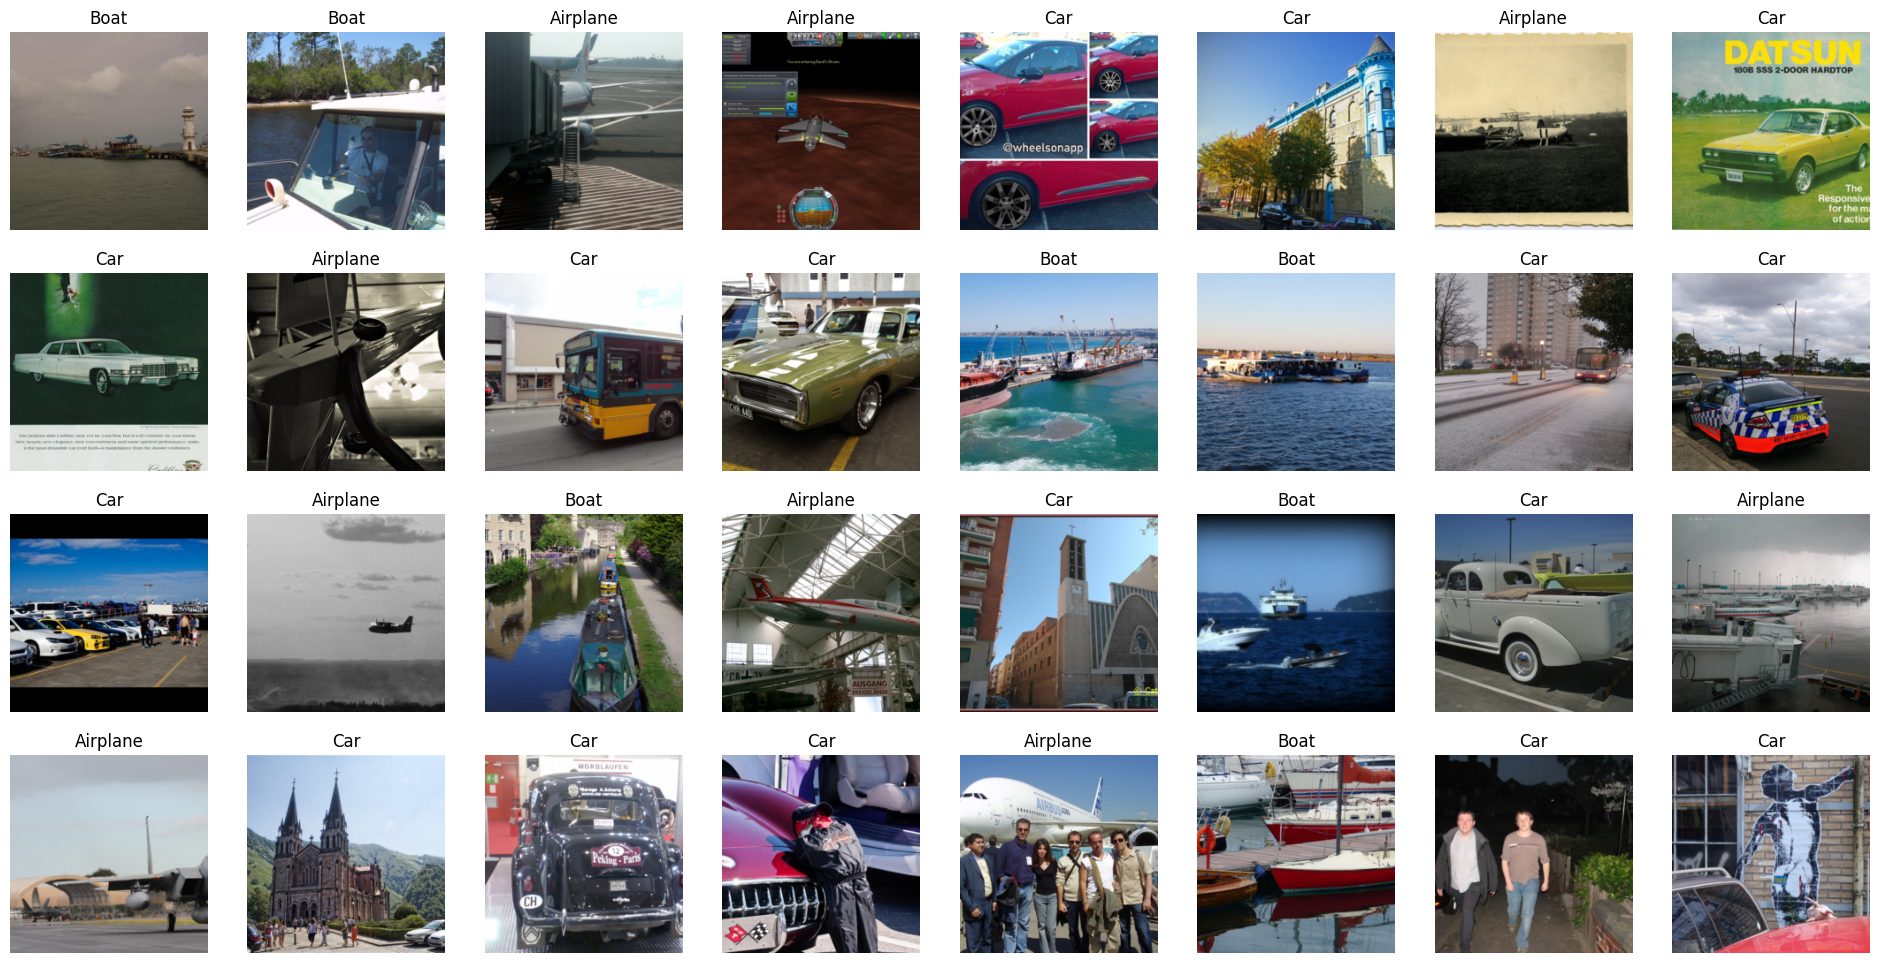

In [ ]:
dls.train.show_batch(max_n=32, nrows = 4)

=> to train with Deep Learning

In [ ]:
learn = vision_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.530677,0.247020,0.900000,00:20


epoch,train_loss,valid_loss,accuracy,time
0,0.340691,0.222955,0.916667,00:09
1,0.261544,0.235448,0.925000,00:09
2,0.201370,0.220177,0.925000,00:09
3,0.156509,0.212891,0.933333,00:09


=> to check how many correct , how many error my model

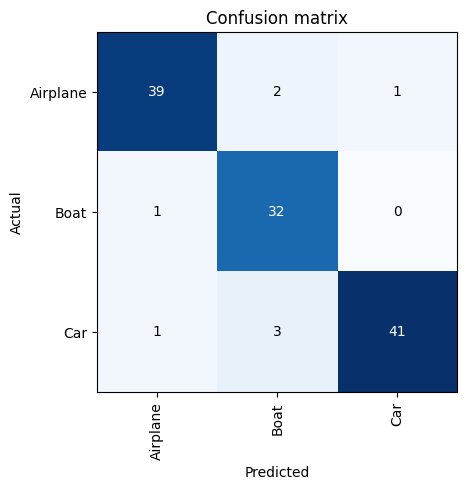

In [ ]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

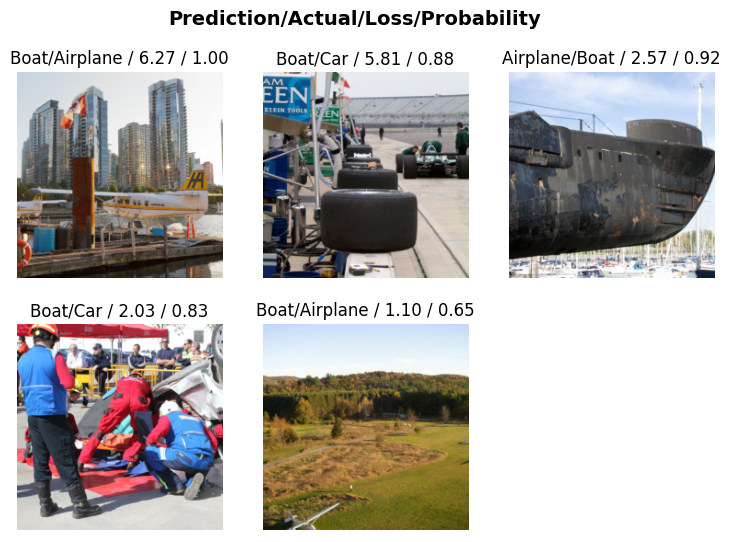

In [ ]:
inter.plot_top_losses(5, nrows = 2)

=> to check our model

In [ ]:
upload = widgets.FileUpload()
display(upload)

NameError: name 'widgets' is not defined

Model Prediction: Airplane
Accuracy prediction: 100.0%


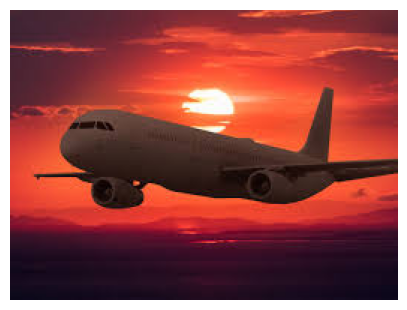

In [ ]:
# to check File downloading
if upload.value:
    file_info = upload.value[0]  # Tuple 1-element (dictionary)
    img_data = file_info['content']  # photo binay informatiion

    # photo downloading
    img = PILImage.create(BytesIO(img_data))

    # to see photo
    img.show()

    # to see prediction via Model
    pred, prob_id, prob = learn.predict(img)
    print(f"Model Prediction: {pred}")
    print(f"Accuracy prediction: {prob[prob_id]*100:.1f}%")
else:
    print("File has not downloaded yet.")


=> to save this train model

=> upload this train model

In [ ]:
#model = load_learner('transport_model.pkl')

c:\Users\Asrorbek\AppData\Local\Programs\Python\Python310\lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [ ]:
model.predict(img)

('Airplane', tensor(0), tensor([1.0000e+00, 4.5577e-07, 2.6625e-09]))